Requirements

In [ ]:
import pandas as pd
from transformers import pipeline
import requests
from tqdm import tqdm

#Draw
import matplotlib.pyplot as plt

Google

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
### Imporant Paths (personal to your G drive) ####
file_path = '/content/drive/My Drive/Colab Notebooks/dataleo/summarized_data.csv'
save_path = '/content/drive/My Drive/Colab Notebooks/dataleo'

In [ ]:
df = pd.read_csv(file_path)
#df.head(5)
#df['plot_synopsis'].head(2)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256 entries, 0 to 255
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   title                     256 non-null    object
 1   paths                     256 non-null    object
 2   imdb_id_x                 256 non-null    object
 3   plot_synopsis             256 non-null    object
 4   tags                      256 non-null    object
 5   split                     256 non-null    object
 6   synopsis_source           256 non-null    object
 7   imdb_id_y                 256 non-null    object
 8   synopsis                  256 non-null    object
 9   genre                     256 non-null    object
 10  Summarized_plot_synopsis  256 non-null    object
dtypes: object(11)
memory usage: 22.1+ KB


In [ ]:
df.shape

(256, 12)

#1. Geres Distribution

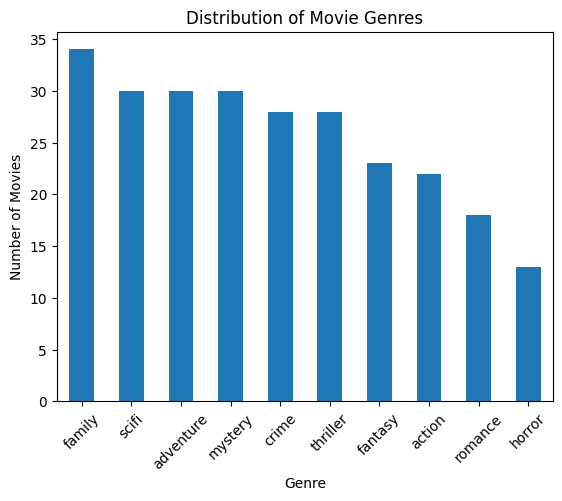

In [ ]:
# Assuming 'df' is your DataFrame
genre_counts = df['genre'].value_counts()
genre_counts.plot(kind='bar')
plt.title('Distribution of Movie Genres')
plt.xlabel('Genre')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45)  # Rotate labels to make them readable
plt.show()

#2. Word Cloud from Summarized Plot Synopses:

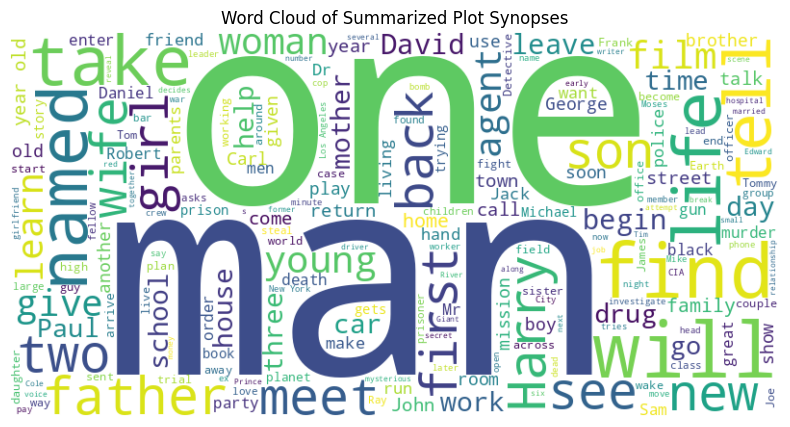

In [ ]:
from wordcloud import WordCloud

# Combine all summarized plot synopses into one large text
all_summaries = ' '.join(df['Summarized_plot_synopsis'].dropna())

# Generate and display a word cloud image
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_summaries)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide axis
plt.title('Word Cloud of Summarized Plot Synopses')
plt.show()

#3. Sentiment Analysis of Synopses:

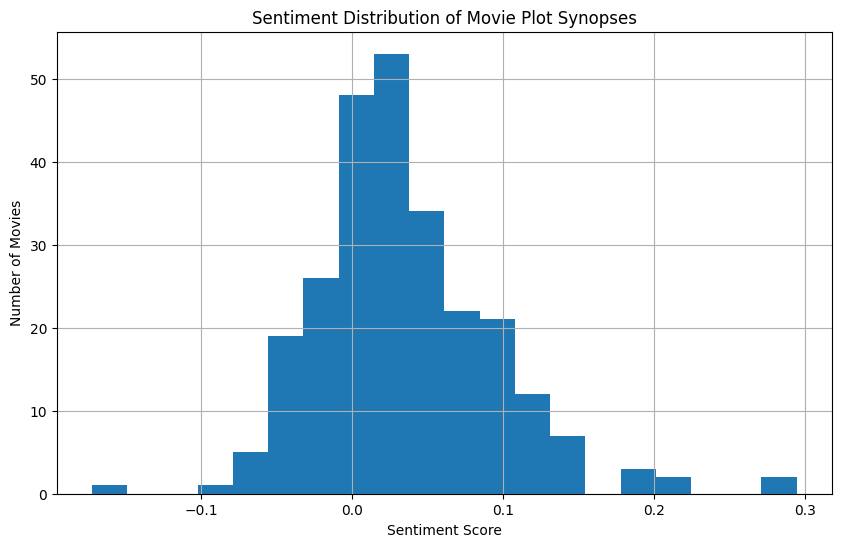

In [ ]:
from textblob import TextBlob

# Compute sentiment for each synopsis
df['Sentiment'] = df['plot_synopsis'].apply(lambda text: TextBlob(str(text)).sentiment.polarity)

# Plot
plt.figure(figsize=(10, 6))
df['Sentiment'].hist(bins=20)
plt.title('Sentiment Distribution of Movie Plot Synopses')
plt.xlabel('Sentiment Score')
plt.ylabel('Number of Movies')
plt.show()

In [ ]:
import plotly.express as px

# Assuming 'df' is your DataFrame and it contains a 'genre' column
fig = px.bar(df['genre'].value_counts().reset_index(), x='index', y='genre',
             labels={'index': 'Genre', 'genre': 'Number of Movies'},
             title='Interactive Distribution of Movie Genres')
fig.update_traces(marker_color='skyblue', marker_line_color='black', marker_line_width=1.5)
fig.update_layout(xaxis_title="Genre", yaxis_title="Number of Movies")
fig.show()


In [ ]:
#Int

##Interactive word cloud

In [ ]:
from wordcloud import WordCloud
import plotly.graph_objs as go

# Generate word frequencies similar to how you would for a word cloud
all_summaries = ' '.join(df['Summarized_plot_synopsis'].dropna())
wordcloud = WordCloud().generate(all_summaries)
words = list(wordcloud.words_.keys())
frequencies = list(wordcloud.words_.values())
sizes = [frequency * 200 for frequency in frequencies]  # Scale factor for visibility in Plotly

# Create a scatter plot of words with sizes based on their frequencies
fig = go.Figure(data=[go.Scatter(x=[i for i in range(len(words))], y=[1]*len(words),
                                 text=words, mode='text',
                                 textfont={'size': sizes})])
fig.update_layout(showlegend=False, xaxis={'showgrid': False, 'showticklabels': False},
                  yaxis={'showgrid': False, 'showticklabels': False}, title='Interactive Word Cloud of Summarized Plot Synopses')
fig.show()
